In [1]:
# Data processing and functions
import pandas as pd
import numpy as np
import scipy as sp

# Analytics and modeling
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import manifold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
import statsmodels.api as sm
import statsmodels.sandbox.tools.tools_pca as sm_pca
from statsmodels.formula.api import ols as sm_ols
from statsmodels.stats.anova import anova_lm as sm_anova
from patsy.contrasts import Treatment
from patsy import dmatrices

# Graphing and visualizing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from pylab import savefig

# Setting graphing preferences
sns.set(style="darkgrid", color_codes=True)

# Printing
import locale

# Show plots locally
locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

C:\Users\mkw5c\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\mkw5c\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
path = "C:/Users/mkw5c/Documents/NeuroimmunologyCapstone/TFIDF/"
file = "processed_Lun.csv"
pca_brain = pd.read_csv(path + file)
pca_brain.shape

(2902, 8857)

In [4]:
pca_brain.columns

Index(['Unnamed: 0', 'cell_id', 'level1class', 'tissue', 'age', 'sex',
       'Tspan12', 'Tshz1', 'Fnbp1l', 'Cldn12',
       ...
       'Phka2', 'Cdkl5', 'Rbbp7', 'Syap1', 'Ctps2', 'Trappc2', 'Rab9', 'Msl3',
       'Vamp7', 'Uty'],
      dtype='object', length=8857)

In [5]:
response_cols = ["tissue", "age", "level1class", "sex"]

In [6]:
responses = pca_brain[response_cols]
responses.shape

(2902, 4)

In [7]:
genes = (pca_brain.loc[:, "Tspan12":])
print(genes.shape)
genes.columns

(2902, 8851)


Index(['Tspan12', 'Tshz1', 'Fnbp1l', 'Cldn12', 'Sema3c', 'Jam2', 'BC005764',
       'Klhl13', 'Tnfaip8l3', 'Atp1b2',
       ...
       'Phka2', 'Cdkl5', 'Rbbp7', 'Syap1', 'Ctps2', 'Trappc2', 'Rab9', 'Msl3',
       'Vamp7', 'Uty'],
      dtype='object', length=8851)

In [8]:
n = len(genes.columns)
print(n)
pca = PCA(n_components = n)
# default is the number of columns in the data 
# but can be set to any integer less than or equal to that value

gene_pca = pca.fit_transform(genes)

# Percentage of variance explained by the first two components

percent_explained = pca.explained_variance_ratio_[:2].sum()*100

print('Percent of explained variance (first two components): %0.0f'
      % percent_explained)


gene_pca.shape

8851
Percent of explained variance (first two components): 18


(2902, 2902)

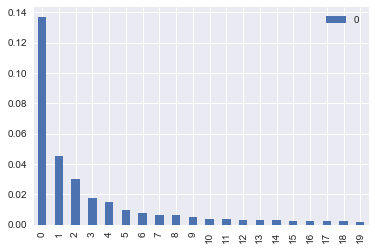

In [9]:
#graph the percentage explained by the first 20 components
var_explained = pd.DataFrame(pca.explained_variance_ratio_)

plt.figure(figsize = (18, 10))
var_explained[0:20].plot(kind = "bar")

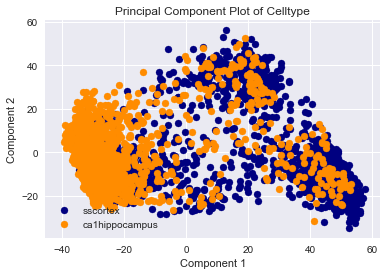

In [10]:

# PCA plot with labels for Cell Source
colors = ['navy', 'darkorange']
celltypes = ["sscortex", "ca1hippocampus"]

fig, ax = plt.subplots()
for i, color in  zip(celltypes, colors):
        ax.scatter(gene_pca[pca_brain["tissue"] == i, 0],
                   gene_pca[pca_brain["tissue"] == i, 1], c = color, label=i)


ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('Principal Component Plot of Celltype')

In [11]:
pca_brain.level1class.value_counts()

pyramidal CA1           937
oligodendrocytes        798
pyramidal SS            392
interneurons            290
astrocytes_ependymal    201
endothelial-mural       195
microglia                89
Name: level1class, dtype: int64

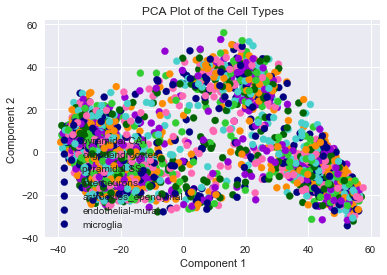

In [12]:
colors = ['navy', 'darkorange', 'mediumturquoise', 'limegreen', "hotpink", "darkviolet", "darkgreen"]
celltype_cats = ["pyramidal CA1", "oligodendrocytes", "pyramidal SS", "interneurons", "astrocytes_ependymal", "endothelial-mural", "microglia"]
fig, ax = plt.subplots()
for i, color in  zip(celltype_cats, colors):
        ax.scatter(gene_pca[pca_brain.level1class == i, 0],
                   gene_pca[pca_brain.level1class == i, 1], c = colors, label=i)
ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('PCA Plot of the Cell Types')

In [13]:
pca_components1_sort = sorted(pca.components_[1, ],reverse = True)
pca_components2_sort = sorted(pca.components_[2,], reverse = True)

In [14]:
pca_df = pd.DataFrame(pca.components_, columns = genes.columns)
pca_df.shape

(2902, 8851)

Citation: https://stackoverflow.com/questions/40433682/get-both-the-top-n-values-and-the-names-of-columns-they-occur-in-within-each-ro/40434047#40434047

In [15]:
tmp = pca_df.apply(lambda row: sorted(zip(pca_df.columns, row), key=lambda cv: -cv[1]), axis=1)

In [16]:
# Slice the top-n columns within each row...
tmp = tmp.iloc[0:20,0:20]

In [17]:
np.array(tmp)[1, 0:15]

array([('Apoe', 0.068511358173728887), ('Atp1a2', 0.063508666439132486),
       ('Cst3', 0.061061339521326932), ('Sparcl1', 0.059917365637553052),
       ('Sparc', 0.055119831226425824), ('Sepp1', 0.043956456497090908),
       ('Slc1a3', 0.041051973129536991), ('Gja1', 0.04087397479377064),
       ('Zfp36l1', 0.04076138009121958), ('Slc1a2', 0.040161218553867964),
       ('Slco1c1', 0.039318857140786326), ('Mfge8', 0.039203118556249035),
       ('Mt2', 0.038504017712519725), ('Pla2g7', 0.03755030152404408),
       ('S1pr1', 0.037001543784374195)], dtype=object)

In [18]:
np.array(tmp)[2, 0:15]

array([('Plp1', 0.076356876328077694), ('Mal', 0.06886590197590263),
       ('Mbp', 0.06525660066213769), ('Mog', 0.064599516136787799),
       ('Aplp1', 0.064301998838379656), ('Trf', 0.063044337509310863),
       ('Ugt8a', 0.062896551503437856), ('Cnp', 0.058946237445189405),
       ('Cldn11', 0.058289619608315954), ('Mag', 0.058149856479739907),
       ('Mobp', 0.056939859504804534), ('Ermn', 0.053963228831948977),
       ('Tspan2', 0.053775075433672825), ('Syt11', 0.053452732607314139),
       ('Enpp2', 0.05315413628606807)], dtype=object)

In [19]:
tmp.values.tolist()

[[('Plp1', 0.11612633000061695),
  ('Trf', 0.092131144826935255),
  ('Mal', 0.086948653790040617),
  ('Mog', 0.078218840902984602),
  ('Apod', 0.078142885665350686),
  ('Car2', 0.075352987328952042),
  ('Mbp', 0.075132499519825549),
  ('Cnp', 0.073516762206767949),
  ('Ugt8a', 0.072584653602458943),
  ('Mobp', 0.068434718419464025),
  ('Ermn', 0.067880248035950053),
  ('Enpp2', 0.067873211780691708),
  ('Mag', 0.064807578303412994),
  ('Cryab', 0.062758467850546271),
  ('Tspan2', 0.060839659806269694),
  ('Cldn11', 0.060609343623549292),
  ('Qk', 0.060293494273302557),
  ('Cd9', 0.060225266803631806),
  ('Sept4', 0.05790934575164837),
  ('Gsn', 0.056743768986098689)],
 [('Apoe', 0.068511358173728887),
  ('Atp1a2', 0.063508666439132486),
  ('Cst3', 0.061061339521326932),
  ('Sparcl1', 0.059917365637553052),
  ('Sparc', 0.055119831226425824),
  ('Sepp1', 0.043956456497090908),
  ('Slc1a3', 0.041051973129536991),
  ('Gja1', 0.04087397479377064),
  ('Zfp36l1', 0.04076138009121958),
  ('Slc

In [20]:
zip(tmp.index, tmp.values.tolist())

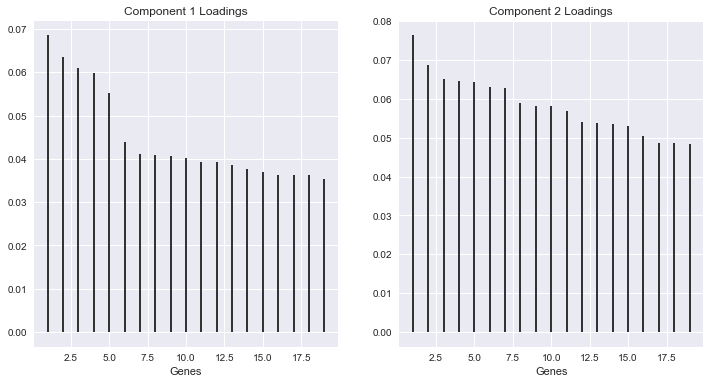

In [21]:
fig = plt.figure(figsize=(12, 6))
Comp1 = fig.add_subplot(121)
Comp2 = fig.add_subplot(122)

Comp1.vlines(range(1,20), [0],pca_components1_sort[0:20])
Comp1.set_xlabel('Genes')
Comp1.set_title('Component 1 Loadings')

Comp2.vlines(range(1,20), [0],pca_components2_sort[0:20])
Comp2.set_xlabel('Genes')
Comp2.set_title('Component 2 Loadings')

In [22]:
model = linear_model.LogisticRegression()

train = np.random.rand(len(gene_pca)) < 0.75
x = gene_pca[train]
x_test = gene_pca[~train]
print(x.shape)
print(x_test.shape)
y = pca_brain["tissue"][train]
y_test = pca_brain["tissue"][~train]
print(y.shape)
print(y_test.shape)

(2171, 2902)
(731, 2902)
(2171,)
(731,)


In [23]:
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
model.score(x_test, y_test)

0.97811217510259918

In [25]:
components = 2

tsne = TSNE(n_components= components, init='random',
                         random_state=42, perplexity=100)

gene_tsne = tsne.fit_transform(genes)

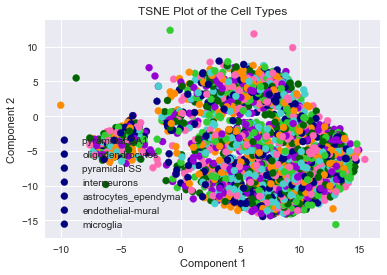

In [26]:
colors = ['navy', 'darkorange', 'mediumturquoise', 'limegreen', "hotpink", "darkviolet", "darkgreen"]
celltype_cats = ["pyramidal CA1", "oligodendrocytes", "pyramidal SS", "interneurons", "astrocytes_ependymal", "endothelial-mural", "microglia"]
fig, ax = plt.subplots()
for i, color in  zip(celltype_cats, colors):
        ax.scatter(gene_tsne[pca_brain.level1class == i, 0],
                   gene_tsne[pca_brain.level1class == i, 1], c = colors, label=i)
ax.legend(loc = 3)
ax.grid(True)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title('TSNE Plot of the Cell Types')